## Importation des librairies

In [37]:
from qiskit import *
from qiskit import Aer
from qiskit.visualization import plot_histogram, plot_state_city

## Création d'un circuit de 8 Qbits

Chaque Qbit du 0 à 3 représente une personne<br>
Chaque Qbit de 4 à 7 représente un raisonnement

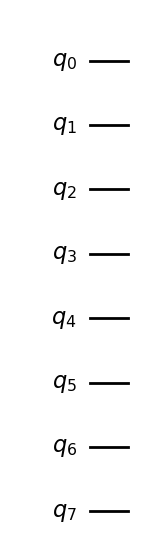

In [24]:
circ = QuantumCircuit(8)
circ.draw('mpl')

Où :<br>
q0 --> Alice<br>
q1 --> Bob<br>
q2 --> Charlie<br>
q3 --> Dahlia<br>
q4 --> Raisonnement d'Alice<br>
q5 --> Raisonnement de Bob<br>
q6 --> Raisonnement de Charlie<br>
q7 --> Raisonnement de Dahlia<br>

## Programmation de portes

### État initial
On place une porte Hadamard sur chaque personne<br>
Une porte Hadamard place un Qbit en superposition des états 0 et 1, et permet de créer des probabilités
de 50 % pour l'obtention d'un état ou de l'autre, et d'explorer tous les cas figure de l'énigme en parallèle

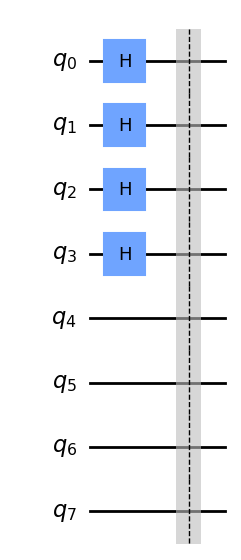

In [25]:
circ.h(0)
circ.h(1)
circ.h(2)
circ.h(3)
circ.barrier(range(8))
circ.draw('mpl')

L'état 0 correspond à pair ou Orange<br>
L'état 1 correspond à impair ou Indigo

On ajoute 3 portes C-not pour représenter les couleurs des 3 chevelures devant Alice et calculer s'il y a un nombre pair ou impair de chevelures Indigo<br>
Une porte C-not utilise 2 bits / un Qbit de contrôle ainsi qu'un Qbit cible.<br>
Si le Qbit de contrôle est en état 1, une porte Not est appliquée au Qbit cible 

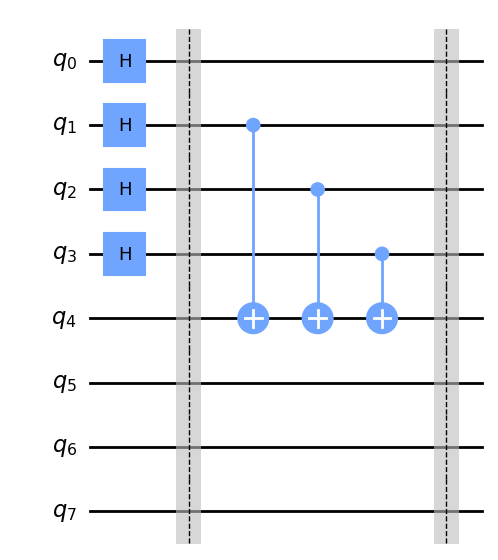

In [26]:
circ.cx(1,4)
circ.cx(2,4)
circ.cx(3,4)
circ.barrier(range(8))
circ.draw('mpl')

Ici, la réponse d'Alice est consignée dans l'état du Qbit 4<br>
Les 3 personnes suivantes écoutent la réponse et prennent en note la oparité des chevelures Indigo<br>
Pour représenter cela, on ajoute encore des portes C-not

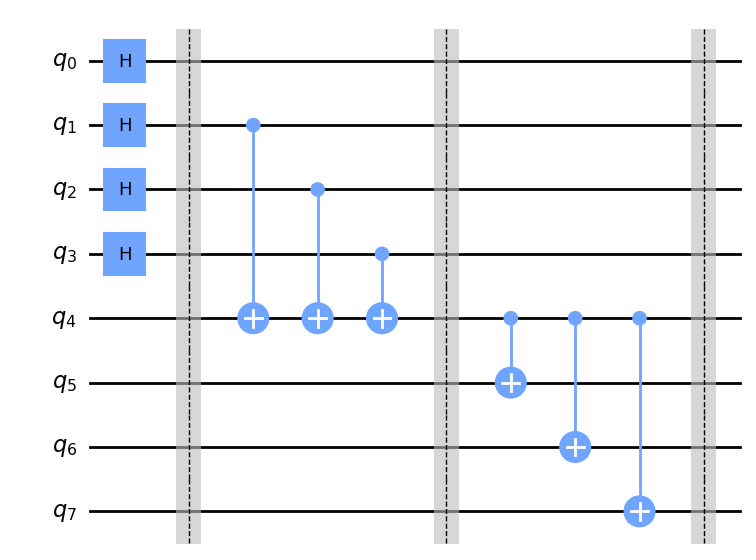

In [27]:
circ.cx(4,5)
circ.cx(4,6)
circ.cx(4,7)
circ.barrier(range(8))
circ.draw('mpl')

Bob voit les couleurs des chevelures devant lui et s'en sert pour déterminer la couleur de sa propre chevelure<br>
Les 2 participants restants prennent en note cette couleur

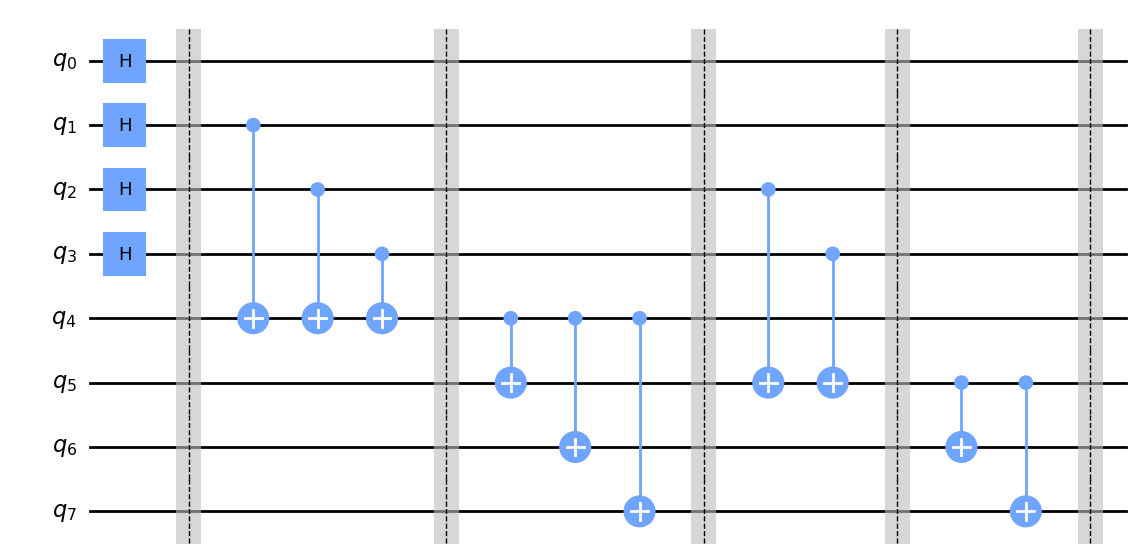

In [28]:
circ.cx(2,5)
circ.cx(3,5)
circ.barrier(range(8))
circ.cx(5,6)
circ.cx(5,7)
circ.barrier(range(8))
circ.draw('mpl')

Charlie note la couleur de la chevelure devant lui, et annonce la couleur de sa propre chevelure

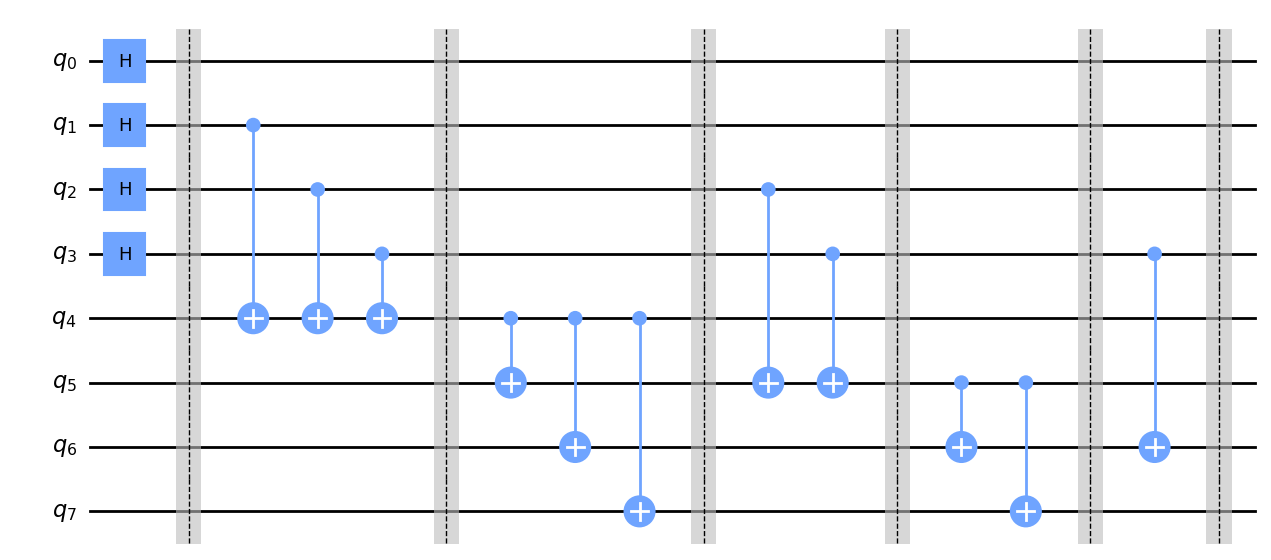

In [29]:
circ.cx(3,6)
circ.barrier(range(8))
circ.draw('mpl')

Dahlia note finalement cette réponse et annonce la couleur de sa propre chevelure

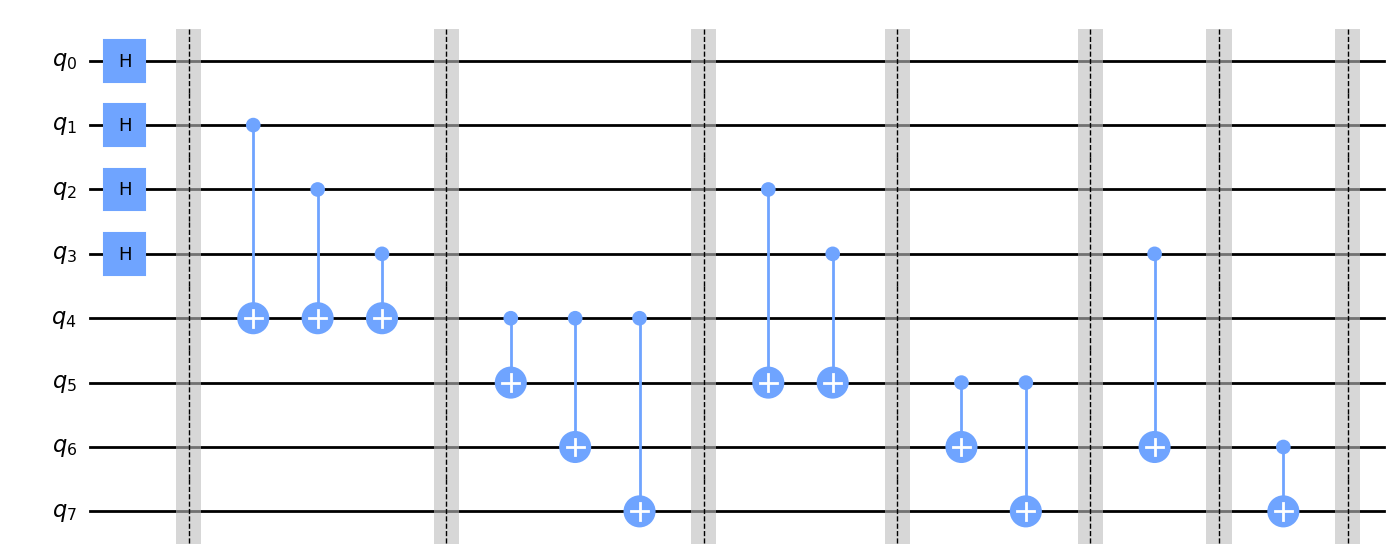

In [30]:
circ.cx(6,7)
circ.barrier(range(8))
circ.draw('mpl')

## Simulation

In [42]:
# Création du moteur de calcul à l'aide de la librairie Aer
backend = Aer.get_backend('statevector_simulator') 

# On exécute le circuit sur le simulateur
simulator = backend.run(circ)

# On récupère les résultats
result = simulator.result()

## Mesure du circuit

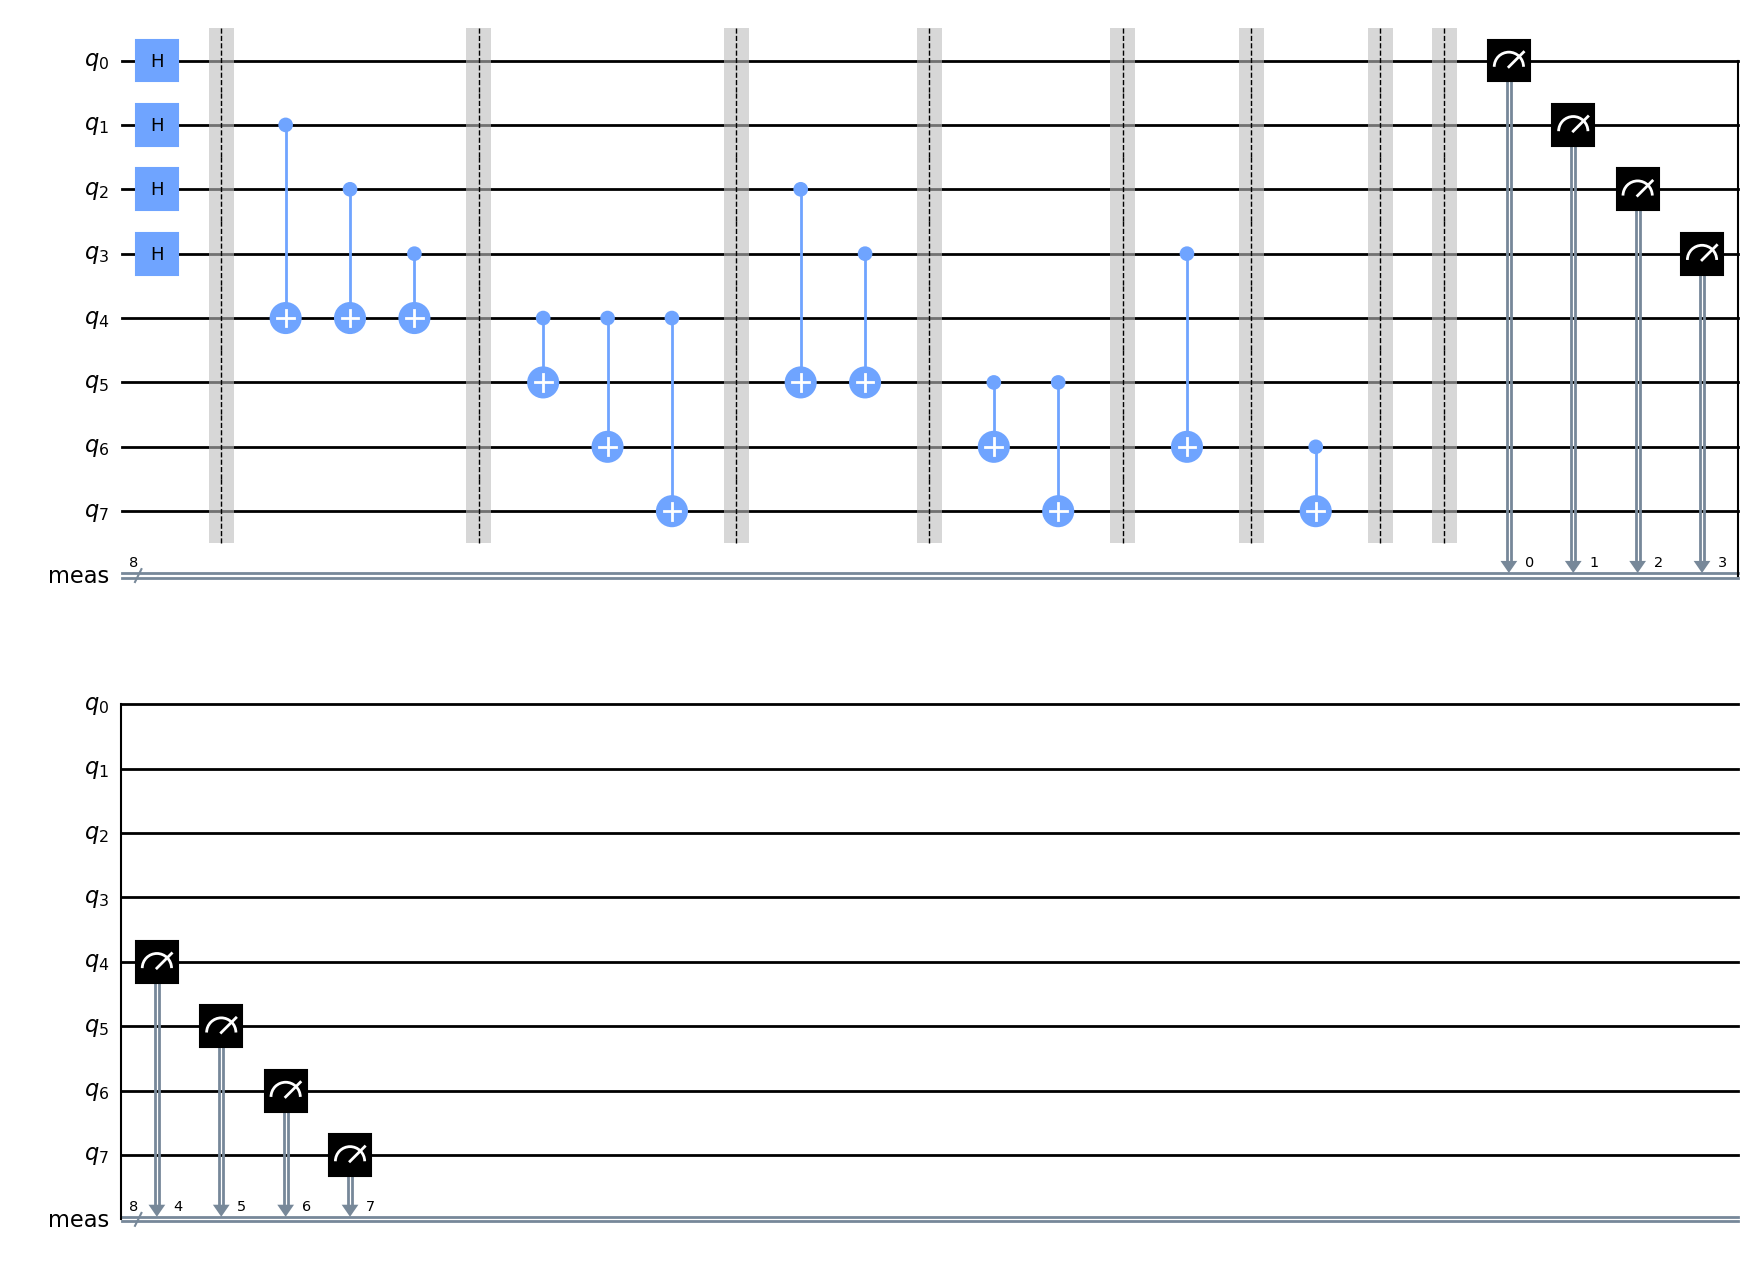

In [32]:
# Mesurer les 8 Qbits sur des bits classiques
circ.measure_all()

circ.draw('mpl')

## Affichage et analyse des résultats

In [33]:
counts = result.get_counts()
print(counts)

{'00000000': 0.0625, '00000001': 0.0625, '00110010': 0.0625, '00110011': 0.0625, '01010100': 0.0625, '01010101': 0.0625, '01100110': 0.0625, '01100111': 0.0625, '10011000': 0.0625, '10011001': 0.0625, '10101010': 0.0625, '10101011': 0.0625, '11001100': 0.0625, '11001101': 0.0625, '11111110': 0.0625, '11111111': 0.0625}


Il y existent 16 combinaisons possibles des couleurs de chevelure<br>
Les Qbits 1 à 3 sont toujours identiques aux Qbits 5 à 7, car les réponses de Bob, Charlie et Dahlia correspondent toujours à la couleur de ses propres chevelures<br>
Le Qbit 0 contient la couleur de la chevelure d'Alice<br>
Le Qbit 7 l'information à propos de la parité du nombre de chevelures Indigo de Bob, Charlie et Dahlia<br>
Rappel : on lit toujours les Qbits de droite à gauche

## Histogrammes

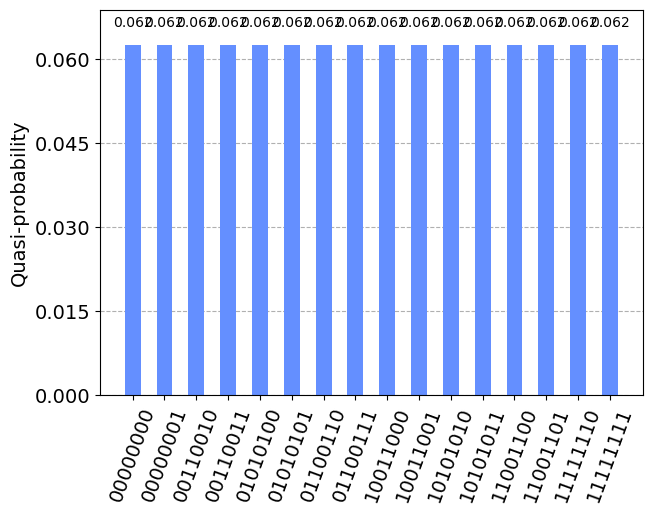

In [39]:
plot_histogram(counts)

On peut voir que la probabilité de tous les résultats (scénarios) est exactement la même

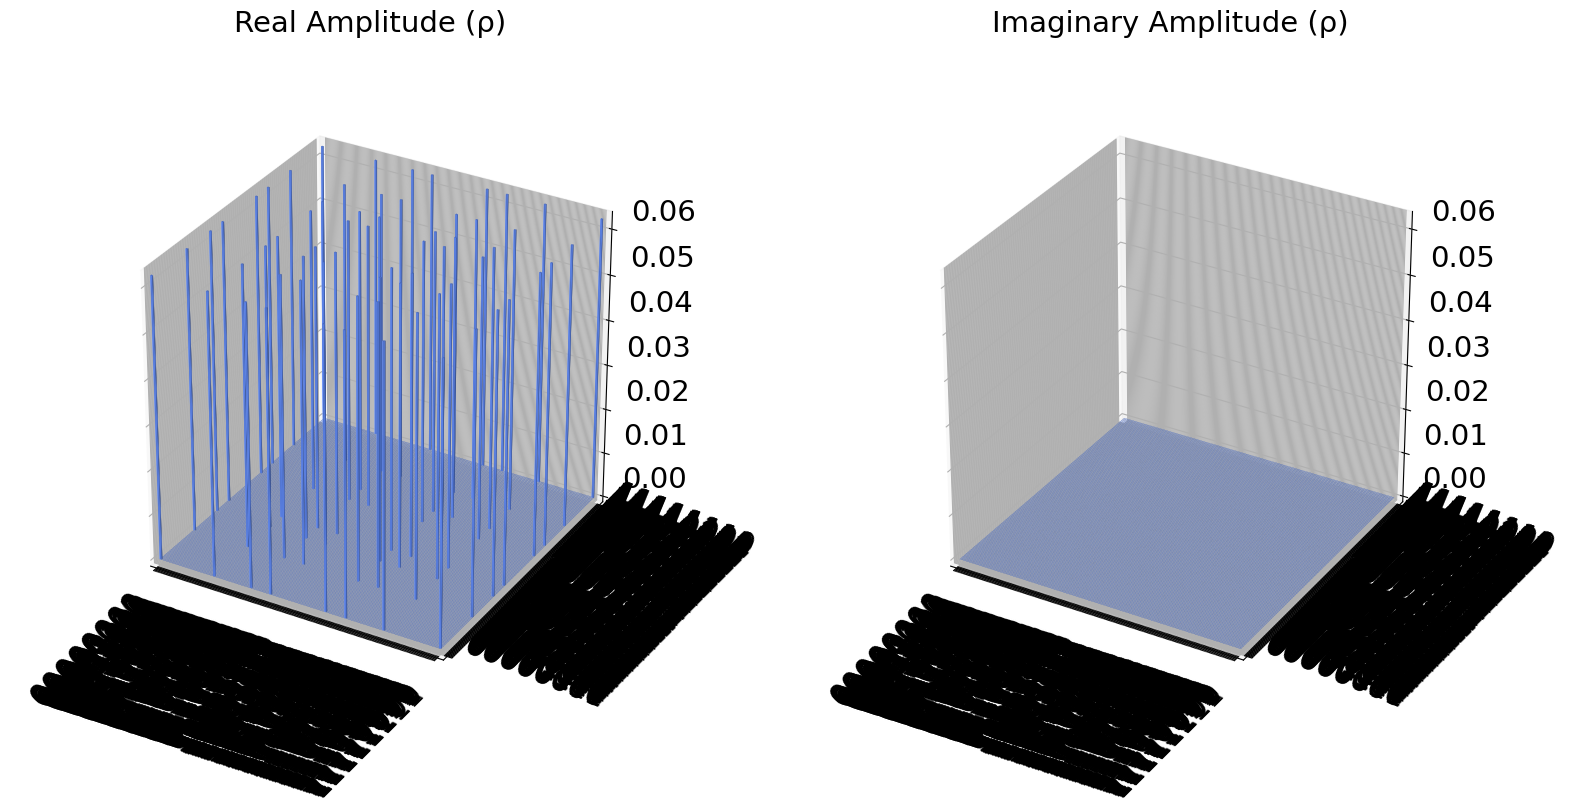

In [38]:
outputstate = result.get_statevector(circ, decimals=3)

plot_state_city(outputstate)